In [1]:
cd ../

c:\Users\damor\OneDrive - Universidad de Concepción\Daniel's space\Projects\Research\ASTROMER\astromer_pe\astromer


In [2]:
import random
import os
import joblib

import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from codes_implemented.utils import open_subsets, distribution_values, create_df_dataset

%load_ext autoreload
%autoreload 2

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
# Dataset ALCOCK 
path_subset_train_alcock = f'data/records/alcock/fold_0/alcock_500/train'
path_subset_val_alcock = f'data/records/alcock/fold_0/alcock_500/val'
path_subset_test_alcock = f'data/records/alcock/fold_0/alcock_500/test'

train_alcock, val_alcock, test_alcock = open_subsets(path_subset_train_alcock, 
                                                  path_subset_val_alcock, 
                                                  path_subset_test_alcock)

# Dataset ATLAS
path_subset_train_atlas = f'data/records/atlas/fold_0/atlas_500/train'
path_subset_val_atlas = f'data/records/atlas/fold_0/atlas_500/val'
path_subset_test_atlas = f'data/records/atlas/fold_0/atlas_500/test'

train_atlas, val_atlas, test_atlas = open_subsets(path_subset_train_atlas, 
                                                  path_subset_val_atlas, 
                                                  path_subset_test_atlas)

# Dataset OGLE
path_subset_train_ogle = f'data/records/ogle/fold_0/ogle_500/train'
path_subset_val_ogle = f'data/records/ogle/fold_0/ogle_500/val'
path_subset_test_ogle = f'data/records/ogle/fold_0/ogle_500/test'


train_ogle, val_ogle, test_ogle = open_subsets(path_subset_train_ogle, 
                                               path_subset_val_ogle, 
                                               path_subset_test_ogle)


Number of records within a class: train\Cep_0
 - opening: data/records/alcock/fold_0/alcock_500/train\Cep_0\chunk_0.record
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Number of records within a class: train\Cep_1
 - opening: data/records/alcock/fold_0/alcock_500/train\Cep_1\chunk_0.record
Number of records within a class: train\EC
 - opening: data/records/alcock/fold_0/alcock_500/train\EC\chunk_0.record
Number of records within a clas

In [4]:
print('**************** ALCOCK dataset ****************')
print('Train size: {}'.format(len(train_alcock)))
print('Val size: {}'.format(len(val_alcock)))
print('Test size: {}'.format(len(test_alcock)))

print('**************** ATLAS dataset ****************')
print('Train size: {}'.format(len(train_atlas)))
print('Val size: {}'.format(len(val_atlas)))
print('Test size: {}'.format(len(test_atlas)))

print('**************** OGLE dataset ****************')
print('Train size: {}'.format(len(train_ogle)))
print('Val size: {}'.format(len(val_ogle)))
print('Test size: {}'.format(len(test_ogle)))

**************** ALCOCK dataset ****************
Train size: 2400
Val size: 600
Test size: 600
**************** ATLAS dataset ****************
Train size: 2000
Val size: 500
Test size: 500
**************** OGLE dataset ****************
Train size: 4000
Val size: 1000
Test size: 1000


In [5]:
# ALCOCK
print('**************** ALCOCK dataset ****************')
print('Training distribution')
train_mag_lcs_alcock, train_cadence_alcock = distribution_values(train_alcock)
print('Validation distribution')
val_mag_lcs_alcock, val_cadence_alcock = distribution_values(val_alcock)
print('Test distribution')
test_mag_lcs_alcock, test_cadence_alcock = distribution_values(test_alcock)

# ATLAS
print('**************** ATLAS dataset ****************')
print('Training distribution')
train_mag_lcs_atlas, train_cadence_atlas = distribution_values(train_atlas)
print('Validation distribution')
val_mag_lcs_atlas, val_cadence_atlas = distribution_values(val_atlas)
print('Test distribution')
test_mag_lcs_atlas, test_cadence_atlas = distribution_values(test_atlas)

# OGLE
print('**************** OGLE dataset ****************')
print('Training distribution')
train_mag_lcs_ogle, train_cadence_ogle = distribution_values(train_ogle)
print('Validation distribution')
val_mag_lcs_ogle, val_cadence_ogle = distribution_values(val_ogle)
print('Test distribution')
test_mag_lcs_ogle, test_cadence_ogle = distribution_values(test_ogle)

**************** ALCOCK dataset ****************
Training distribution


c:\Users\damor\OneDrive - Universidad de Concepción\Daniel's space\Projects\Research\ASTROMER\astromer_pe\astromer\codes_implemented\utils.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.concatenate(np.array(mag_lcs)), np.concatenate(np.array(mjd_lcs_diff))


Validation distribution
Test distribution
**************** ATLAS dataset ****************
Training distribution
Validation distribution
Test distribution
**************** OGLE dataset ****************
Training distribution
Validation distribution
Test distribution


In [6]:
alcock_cadence_subsets = [train_cadence_alcock, val_cadence_alcock, test_cadence_alcock]
atlas_cadence_subsets = [train_cadence_atlas, val_cadence_atlas, test_cadence_atlas]
ogle_cadence_subsets = [train_cadence_ogle, val_cadence_ogle, test_cadence_ogle]

In [7]:
alcock_cadence_dataset = create_df_dataset(alcock_cadence_subsets, name_col='Cadence')
atlas_cadence_dataset = create_df_dataset(atlas_cadence_subsets, name_col='Cadence')
ogle_cadence_dataset = create_df_dataset(ogle_cadence_subsets, name_col='Cadence')

In [8]:
X_alcock = alcock_cadence_dataset['Cadence'].values
X_atlas = atlas_cadence_dataset['Cadence'].values
X_ogle = ogle_cadence_dataset['Cadence'].values

print(X_alcock.shape)
print(X_atlas.shape)
print(X_ogle.shape)

(2506759,)
(375084,)
(4698161,)


In [9]:
print('**************** ALCOCK dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_alcock)))
print('Media: {:.3f}'.format(np.mean(X_alcock)))
print('Std: {:.3f}'.format(np.std(X_alcock)))

print('**************** ATLAS dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_atlas)))
print('Media: {:.3f}'.format(np.mean(X_atlas)))
print('Std: {:.3f}'.format(np.std(X_atlas)))

print('**************** OGLE dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_ogle)))
print('Media: {:.3f}'.format(np.mean(X_ogle)))
print('Std: {:.3f}'.format(np.std(X_ogle)))

**************** ALCOCK dataset ****************
Mediana: 1.930
Media: 3.827
Std: 10.607
**************** ATLAS dataset ****************
Mediana: 0.016
Media: 4.864
Std: 19.766
**************** OGLE dataset ****************
Mediana: 1.094
Media: 3.492
Std: 14.510


In [10]:
print('**************** ALCOCK dataset ****************')
list_X_alcock = list(X_alcock)
#minimum = min(list_X_alcock)
#maximum = max(list_X_alcock)
#list_X_alcock.remove(max(list_X_alcock))
#list_X_alcock.remove(min(list_X_alcock))

X_alcock_sample = random.sample(list_X_alcock, 30000)
#X_alcock_sample.append(minimum)
#X_alcock_sample.append(maximum)

print('Mediana: {:.3f}'.format(np.median(X_alcock_sample)))
print('Media: {:.3f}'.format(np.mean(X_alcock_sample)))
print('Std: {:.3f}'.format(np.std(X_alcock_sample)))

print('**************** ATLAS dataset ****************')
list_X_atlas = list(X_atlas)
#minimum = min(list_X_atlas)
#maximum = max(list_X_atlas)
#list_X_atlas.remove(max(list_X_atlas))
#list_X_atlas.remove(min(list_X_atlas))

X_atlas_sample = random.sample(list_X_atlas, 30000)
#X_atlas_sample.append(minimum)
#X_atlas_sample.append(maximum)

print('Mediana: {:.3f}'.format(np.median(X_atlas_sample)))
print('Media: {:.3f}'.format(np.mean(X_atlas_sample)))
print('Std: {:.3f}'.format(np.std(X_atlas_sample)))

print('**************** OGLE dataset ****************')
list_X_ogle = list(X_ogle)
#minimum = min(list_X_ogle)
#maximum = max(list_X_ogle)
#list_X_ogle.remove(max(list_X_ogle))
#list_X_ogle.remove(min(list_X_ogle))

X_ogle_sample = random.sample(list_X_ogle, 30000)
#X_ogle_sample.append(minimum)
#X_ogle_sample.append(maximum)

print('Mediana: {:.3f}'.format(np.median(X_ogle_sample)))
print('Media: {:.3f}'.format(np.mean(X_ogle_sample)))
print('Std: {:.3f}'.format(np.std(X_ogle_sample)))

**************** ALCOCK dataset ****************
Mediana: 1.934
Media: 3.881
Std: 10.485
**************** ATLAS dataset ****************
Mediana: 0.016
Media: 4.945
Std: 20.215
**************** OGLE dataset ****************
Mediana: 1.093
Media: 3.597
Std: 16.028


## Models KDE

In [11]:
path_save_model = 'models_kde'

In [12]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KernelDensity

params_grid = {
    'bandwidth': np.linspace(0.1, 2.5, 50),
}

grid = GridSearchCV(KernelDensity(), 
                    params_grid, 
                    cv=5,
                    verbose=0)

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(np.array(X_alcock_sample)[:, None])

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_)

model_alcock_kde = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 1.226530612244898} : -14818.084199951747


In [13]:
gen_alcock_samples = model_alcock_kde.sample(X_alcock.shape[0])

print('**************** ALCOCK dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_alcock_samples)))
print('Media: {:.3f}'.format(np.mean(gen_alcock_samples)))
print('Std: {:.3f}'.format(np.std(gen_alcock_samples)))

print('**************** ALCOCK dataset real ****************')
print('Mediana: {:.3f}'.format(np.median(X_alcock)))
print('Media: {:.3f}'.format(np.mean(X_alcock)))
print('Std: {:.3f}'.format(np.std(X_alcock)))

**************** ALCOCK dataset generated ****************
Mediana: 2.070
Media: 3.885
Std: 10.633
**************** ALCOCK dataset real ****************
Mediana: 1.930
Media: 3.827
Std: 10.607


In [14]:
joblib.dump(model_alcock_kde, './{}/model_alcock_kde.joblib'.format(path_save_model))

['./models_kde/model_alcock_kde.joblib']

In [15]:
kde_load_alcock = joblib.load('./{}/model_alcock_kde.joblib'.format(path_save_model)) 

gen_alcock_samples = kde_load_alcock.sample(X_alcock.shape[0])

print('**************** ALCOCK dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_alcock_samples)))
print('Media: {:.3f}'.format(np.mean(gen_alcock_samples)))
print('Std: {:.3f}'.format(np.std(gen_alcock_samples)))

**************** ALCOCK dataset generated ****************
Mediana: 2.070
Media: 3.881
Std: 10.532


In [11]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KernelDensity

params_grid = {
    'bandwidth': np.linspace(0.1, 1.0, 30),
}

grid = GridSearchCV(KernelDensity(), 
                    params_grid, 
                    cv=5,
                    verbose=0)

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(np.array(X_atlas_sample)[:, None])

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_)

model_atlas_kde = grid.best_estimator_


KeyboardInterrupt



In [44]:
gen_atlas_samples = model_atlas_kde.sample(X_atlas.shape[0])

print('**************** ATLAS dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_atlas_samples)))
print('Media: {:.3f}'.format(np.mean(gen_atlas_samples)))
print('Std: {:.3f}'.format(np.std(gen_atlas_samples)))

print('**************** ATLAS dataset real ****************')
print('Mediana: {:.3f}'.format(np.median(X_atlas)))
print('Media: {:.3f}'.format(np.mean(X_atlas)))
print('Std: {:.3f}'.format(np.std(X_atlas)))

**************** ATLAS dataset generated ****************
Mediana: 0.260
Media: 5.005
Std: 20.065
**************** ATLAS dataset real ****************
Mediana: 0.016
Media: 4.864
Std: 19.766


In [14]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KernelDensity

params_grid = {
    'bandwidth': np.linspace(0.01, 1.3, 50),
}

grid = GridSearchCV(KernelDensity(),
                    params_grid,
                    cv=5,
                    verbose=0)

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(np.array(X_ogle_sample)[:, None])

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_)

model_ogle_kde = grid.best_estimator_


KeyboardInterrupt



In [35]:
gen_ogle_samples = model_ogle_kde.sample(X_ogle.shape[0])

print('**************** OGLE dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_ogle_samples)))
print('Media: {:.3f}'.format(np.mean(gen_ogle_samples)))
print('Std: {:.3f}'.format(np.std(gen_ogle_samples)))

print('**************** OGLE dataset real ****************')
print('Mediana: {:.3f}'.format(np.median(X_ogle)))
print('Media: {:.3f}'.format(np.mean(X_ogle)))
print('Std: {:.3f}'.format(np.std(X_ogle)))

**************** OGLE dataset generated ****************
Mediana: 1.538
Media: 3.560
Std: 13.673
**************** OGLE dataset real ****************
Mediana: 1.094
Media: 3.492
Std: 14.510


In [36]:
joblib.dump(model_atlas_kde, './{}/model_atlas_kde.joblib'.format(path_save_model))
joblib.dump(model_ogle_kde, './{}/model_ogle_kde.joblib'.format(path_save_model))

['./models_kde/model_ogle_kde.joblib']

In [16]:
kde_load_atlas = joblib.load('./{}/model_atlas_kde.joblib'.format(path_save_model)) 
kde_load_ogle = joblib.load('./{}/model_ogle_kde.joblib'.format(path_save_model)) 

In [17]:
gen_altas_samples = kde_load_atlas.sample(X_atlas.shape[0])

print('**************** ATLAS dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_altas_samples)))
print('Media: {:.3f}'.format(np.mean(gen_altas_samples)))
print('Std: {:.3f}'.format(np.std(gen_altas_samples)))

gen_ogle_samples = kde_load_ogle.sample(X_ogle.shape[0])

print('**************** OGLE dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(gen_ogle_samples)))
print('Media: {:.3f}'.format(np.mean(gen_ogle_samples)))
print('Std: {:.3f}'.format(np.std(gen_ogle_samples)))

**************** ATLAS dataset generated ****************
Mediana: 0.114
Media: 4.733
Std: 19.169
**************** OGLE dataset generated ****************
Mediana: 1.538
Media: 3.558
Std: 13.671


In [23]:
gen_altas_samples

array([[ 0.51005744],
       [-0.15727058],
       [ 8.64040676],
       ...,
       [ 0.28346376],
       [-0.07750607],
       [ 0.08438389]])

In [25]:
samples_generated = []
while X_atlas.shape[0] != len(samples_generated):
    sample = kde_load_atlas.sample(1)
    
    if sample >= 0:
        samples_generated.append(sample[0])
        
samples_generated = np.array(samples_generated)
samples_generated

array([[ 4.10302291],
       [19.60962805],
       [ 0.16537872],
       ...,
       [ 0.91574946],
       [ 0.15627092],
       [ 0.16911414]])

In [26]:
print('**************** ATLAS dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(samples_generated)))
print('Media: {:.3f}'.format(np.mean(samples_generated)))
print('Std: {:.3f}'.format(np.std(samples_generated)))

**************** ATLAS dataset generated ****************
Mediana: 0.332
Media: 7.611
Std: 23.698


In [27]:
samples_generated = []
while X_ogle.shape[0] != len(samples_generated):
    sample = kde_load_ogle.sample(1)
    
    if sample >= 0:
        samples_generated.append(sample[0])
        
samples_generated = np.array(samples_generated)
samples_generated

array([[1.79953046],
       [1.93190627],
       [0.33075917],
       ...,
       [3.42678829],
       [1.17627938],
       [0.12852304]])

In [28]:
print('**************** OGLE dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(samples_generated)))
print('Media: {:.3f}'.format(np.mean(samples_generated)))
print('Std: {:.3f}'.format(np.std(samples_generated)))

**************** OGLE dataset generated ****************
Mediana: 2.055
Media: 4.493
Std: 14.898


In [39]:
samples_generated = kde_load_atlas.sample(X_atlas.shape[0])
samples_generated[samples_generated < 0] = 0.016

In [40]:
print('**************** ATLAS dataset generated ****************')
print('Mediana: {:.3f}'.format(np.median(samples_generated)))
print('Media: {:.3f}'.format(np.mean(samples_generated)))
print('Std: {:.3f}'.format(np.std(samples_generated)))

**************** ATLAS dataset generated ****************
Mediana: 0.114
Media: 4.845
Std: 19.169


In [75]:
from sklearn.neighbors import KernelDensity

model_kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
model_kde.fit(np.array(sample_cadence)[:, None])

KernelDensity()

In [38]:
#x_grid = np.linspace(X_train.min()-5, X_train.max()+5, 20000)
x_grid = np.linspace(0, 100, 1000)
x_grid.shape

(1000,)

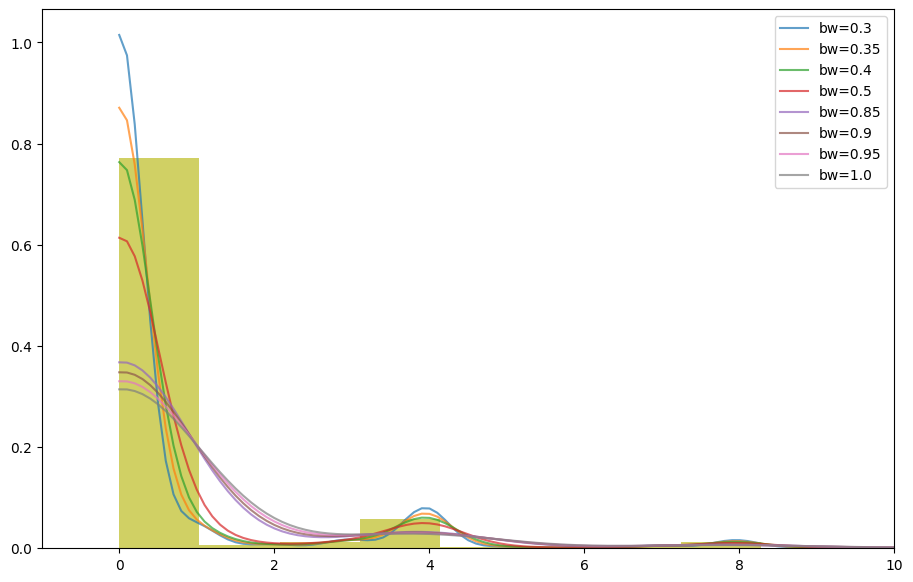

In [60]:
fig, ax = plt.subplots(figsize=(11, 7))

# [0.1, 0.3, 0.6, 0.9, 1.2]
for bandwidth in [0.3, 0.35, 0.4, 0.5, 0.85, 0.9, 0.95, 1.0]:
    model_kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    model_kde.fit(X_train[:, None])
    lnprob = model_kde.score_samples(x_grid[:, None])
    pdf_data = np.exp(lnprob)
    
    ax.plot(x_grid, pdf_data,
            label='bw={0}'.format(bandwidth), linewidth=1.5, alpha=0.7)
    
ax.hist(X_train, bins=600, density=True, alpha=0.7)
ax.set_xlim(-1, 10)
ax.legend(loc='upper right')

In [61]:
np.linspace(0.1, 1.0, 30)

array([0.1       , 0.13103448, 0.16206897, 0.19310345, 0.22413793,
       0.25517241, 0.2862069 , 0.31724138, 0.34827586, 0.37931034,
       0.41034483, 0.44137931, 0.47241379, 0.50344828, 0.53448276,
       0.56551724, 0.59655172, 0.62758621, 0.65862069, 0.68965517,
       0.72068966, 0.75172414, 0.78275862, 0.8137931 , 0.84482759,
       0.87586207, 0.90689655, 0.93793103, 0.96896552, 1.        ])

In [ ]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=5) # 20-fold cross-validation
grid.fit(x[:, None])
print grid.best_params_

In [80]:
np.linspace(0.1, 1.0, 30)

array([0.1       , 0.13103448, 0.16206897, 0.19310345, 0.22413793,
       0.25517241, 0.2862069 , 0.31724138, 0.34827586, 0.37931034,
       0.41034483, 0.44137931, 0.47241379, 0.50344828, 0.53448276,
       0.56551724, 0.59655172, 0.62758621, 0.65862069, 0.68965517,
       0.72068966, 0.75172414, 0.78275862, 0.8137931 , 0.84482759,
       0.87586207, 0.90689655, 0.93793103, 0.96896552, 1.        ])

In [84]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KernelDensity

params_grid = {
    'bandwidth': np.linspace(0.1, 1.0, 30),
}

grid = GridSearchCV(KernelDensity(), 
                    params_grid, 
                    cv=5,
                    verbose=0)

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(np.array(sample_cadence)[:, None])

KeyboardInterrupt: 

In [79]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_)

model_kde = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 0.16206896551724137} : -1600.0617502259431


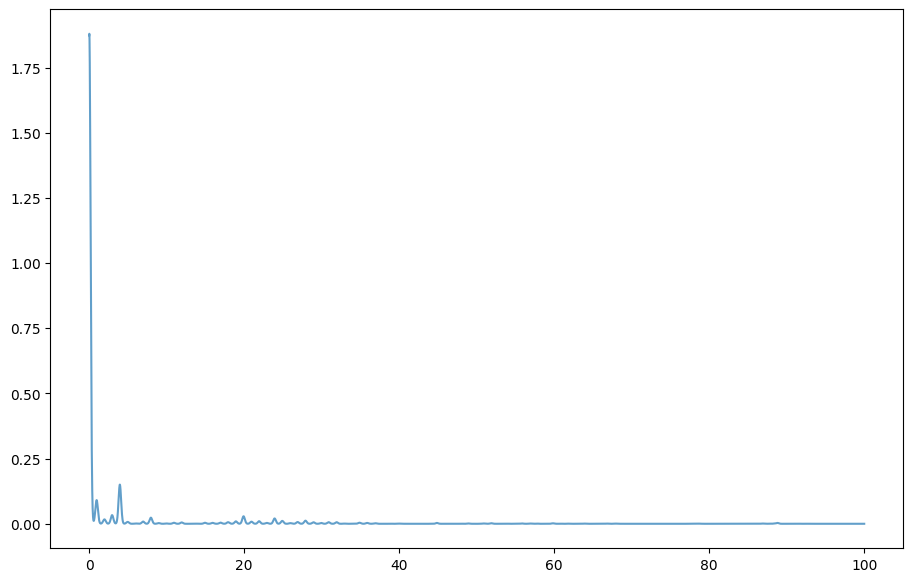

In [82]:
x_grid = np.linspace(0, 100, 10000)

fig, ax = plt.subplots(figsize=(11, 7))

lnprob = model_kde.score_samples(x_grid[:, None])
pdf_data = np.exp(lnprob)

ax.plot(x_grid, pdf_data,
        label='bw={0}'.format(bandwidth), linewidth=1.5, alpha=0.7)

In [22]:
logprob = model_kde.score_samples(X_test[:, None][:1000])
logprob

array([ -1.15790657,  -3.56066963,  -1.15790657,  -1.15735094,
        -3.55653333,  -1.15735094,  -1.15724897,  -1.15724897,
        -5.04219918,  -1.15746769,  -1.15735094,  -1.15724897,
        -1.1575992 ,  -1.15790657,  -1.15746769,  -1.1575992 ,
        -1.15746769,  -5.77252518,  -1.15790657,  -1.1577455 ,
        -8.45719391,  -1.15724897,  -5.22452934,  -1.15790657,
        -1.15724897,  -1.15746769,  -1.15724897,  -1.1575992 ,
        -1.1577455 ,  -1.15735094,  -1.15724897,  -1.15735094,
        -1.15790657,  -5.89521869,  -1.55504046,  -1.15746769,
        -1.15716177,  -1.1577455 ,  -1.15735094,  -1.1569472 ,
        -1.51909625,  -1.15724897,  -1.15735094,  -3.55292477,
        -1.15790657,  -1.15746769,  -4.85250326,  -1.15790657,
        -1.1577455 ,  -3.55883172,  -1.15746769,  -1.1575992 ,
        -1.1575992 ,  -1.15790657,  -1.1575992 ,  -1.15735094,
        -1.15746769,  -1.15735094,  -4.85756871,  -3.54943451,
        -1.15716177,  -1.15724897,  -1.15735094,  -1.15

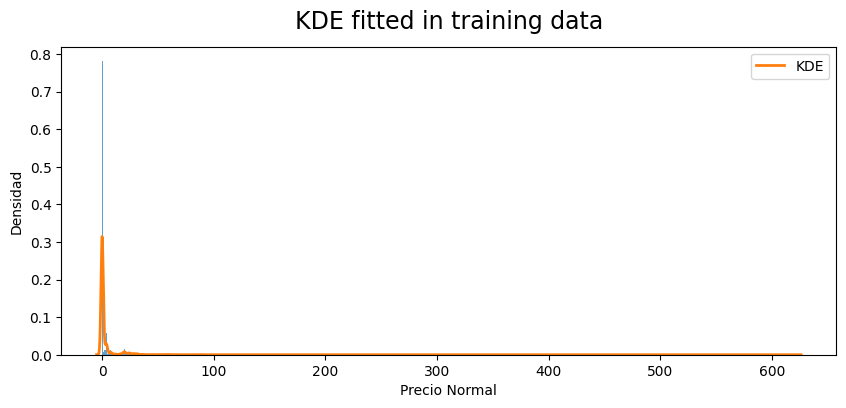

In [24]:
# Conjunto de entrenamiento
x_soporte = np.linspace(X_train.min()-5, X_train.max()+5, 20000)
pdf = np.exp(model_kde.score_samples(x_soporte[:, None]))

plt.figure(figsize=(10, 4), dpi=100)

plt.hist(X_train, bins='scott', density=True, alpha=0.7)
plt.plot(x_soporte, pdf, color="tab:orange", linestyle="-", lw="2", label="KDE")

plt.title("KDE fitted in training data", pad=13, fontsize=17)
plt.xlabel("Precio Normal")
plt.ylabel("Densidad")

plt.legend()
plt.show()

(-0.02, 0.22)

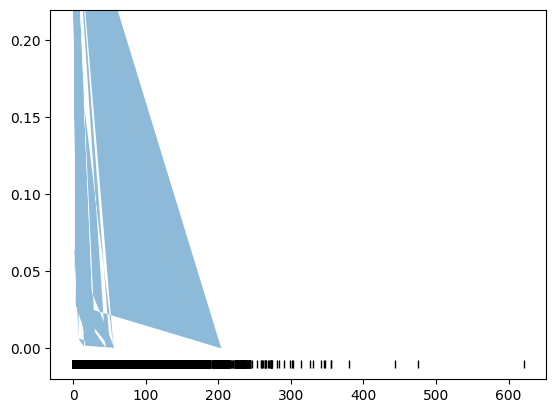

In [23]:
plt.fill_between(X_test[:1000], np.exp(logprob), alpha=0.5)
plt.plot(X_train, np.full_like(X_train, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [11]:
np.logspace(-5, 15, 10)

array([1.00000000e-05, 1.66810054e-03, 2.78255940e-01, 4.64158883e+01,
       7.74263683e+03, 1.29154967e+06, 2.15443469e+08, 3.59381366e+10,
       5.99484250e+12, 1.00000000e+15])

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KernelDensity

params_grid = {
    'bandwidth': np.logspace(-5, 15, 10),
}

grid = GridSearchCV(KernelDensity(), 
                    params_grid, 
                    cv=5,
                    verbose=0)

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X_train)

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_)

model_kde = grid.best_estimator_

In [ ]:
# Conjunto de entrenamiento
x_soporte = np.linspace(X_train.min()-5, X_train.max()+5, 20000)
pdf = np.exp(model_kde.score_samples(x_soporte[:, None]))

plt.figure(figsize=(10, 4), dpi=100)

plt.hist(X_train, bins='scott', density=True, alpha=0.7)
plt.plot(x_soporte, pdf, color="tab:orange", linestyle="-", lw="2", label="KDE")

plt.title("KDE fitted in training data", pad=13, fontsize=17)
plt.xlabel("Precio Normal")
plt.ylabel("Densidad")

plt.legend()
plt.show()

In [ ]:
# Conjunto de test
plt.figure(figsize=(10, 4), dpi=100)

plt.hist(X_test, bins='auto', density=True, alpha=0.7)
plt.plot(x_soporte, pdf, color="tab:orange", linestyle="-", lw="2", label="KDE")

plt.title("KDE shown in test data", pad=13, fontsize=17)
plt.xlabel("Precio Normal")
plt.ylabel("Densidad")

plt.legend()
plt.show()